In [ ]:
import pandas as pd
stock_data=pd.read_csv('./NFLX.csv',index_col='Date')
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-28,334.700012,336.299988,328.880005,335.660004,335.660004,8652100
2019-01-29,335.869995,338.220001,328.149994,328.899994,328.899994,7655200
2019-01-30,332.750000,341.779999,330.799988,340.660004,340.660004,9234500
2019-01-31,339.679993,345.989990,338.089996,339.500000,339.500000,8535500
2019-02-01,337.179993,346.839996,336.500000,339.850006,339.850006,9827800


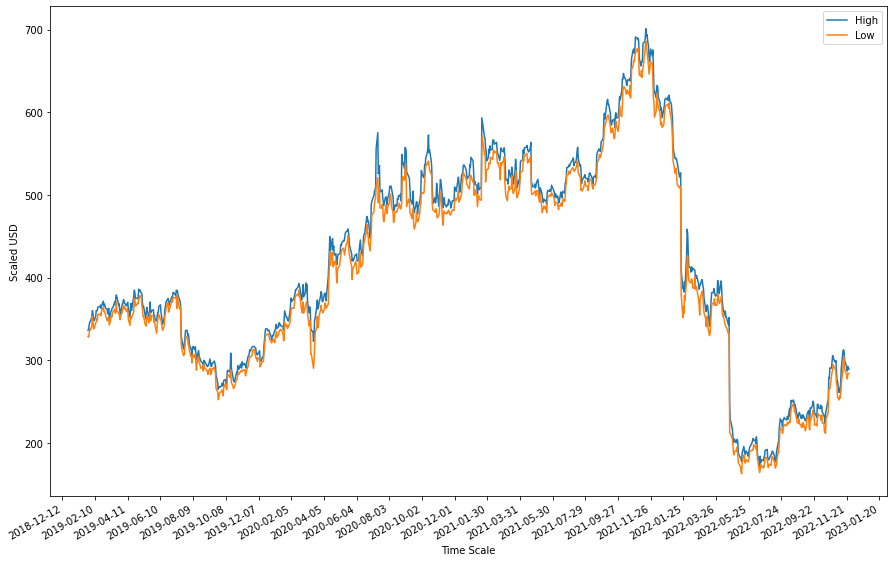

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter ('%Y-%m-%d')) 
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in stock_data.index.values]

plt.plot(x_dates, stock_data['High'], label='High')
plt.plot(x_dates, stock_data['Low'], label='Low')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


In [ ]:
import numpy as np 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error


In [ ]:
target_y = stock_data['Close']
X_feat = stock_data.iloc[:,0:3]


In [ ]:
#Feature Scaling
SC = StandardScaler()
X_ft  =  SC.fit_transform(X_feat.values) 
X_ft = pd.DataFrame(columns=X_feat.columns,data=X_ft,index=X_feat.index)


In [ ]:
def  lstm_split(data, n_steps):
      X, y = [], [] 
      for i in range(len(data)-n_steps+1):
            X.append(data[i:i +n_steps,:-1])
            y.append(data[i + n_steps-1, -1])
      return np.array(X),  np.array(y)


In [ ]:
X1, y1 = lstm_split(stock_data_ft.values, n_steps=2)
train_split=0.8
split_idx =  int(np.ceil(len(X1)*train_split)) 
date_index  = stock_data_ft.index

X_train,  X_test  = X1[:split_idx],  X1[split_idx:]
y_train, y_test  = y1[:split_idx],  y1[split_idx:] 
X_train_date,  X_test_date = date_index[:split_idx],  date_index[split_idx:]
print(X1.shape,  X_train.shape, X_test.shape,  y_test.shape)


(966, 2, 5) (773, 2, 5) (193, 2, 5) (193,)


In [ ]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(X_train.shape[1],  X_train.shape[2]),
              activation= 'relu', return_sequences=True))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error',  optimizer='adam')
lstm.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 32)             4864      
                                                                 
 dense (Dense)               (None, 2, 1)              33        
                                                                 
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=lstm.fit(X_train, y_train,
                  epochs=100, batch_size=4, 
                  verbose=2, shuffle=False)


Epoch 1/100
194/194 - 0s - loss: 40877644840960.0000 - 362ms/epoch - 2ms/step
Epoch 2/100
194/194 - 0s - loss: 40864223068160.0000 - 364ms/epoch - 2ms/step
Epoch 3/100
194/194 - 0s - loss: 40850738380800.0000 - 331ms/epoch - 2ms/step
Epoch 4/100
194/194 - 0s - loss: 40837186584576.0000 - 344ms/epoch - 2ms/step
Epoch 5/100
194/194 - 0s - loss: 40823550902272.0000 - 362ms/epoch - 2ms/step
Epoch 6/100
194/194 - 0s - loss: 40809848111104.0000 - 347ms/epoch - 2ms/step
Epoch 7/100
194/194 - 0s - loss: 40796074016768.0000 - 342ms/epoch - 2ms/step
Epoch 8/100
194/194 - 0s - loss: 40782199259136.0000 - 365ms/epoch - 2ms/step
Epoch 9/100
194/194 - 0s - loss: 40768265781248.0000 - 408ms/epoch - 2ms/step
Epoch 10/100
194/194 - 0s - loss: 40754244222976.0000 - 361ms/epoch - 2ms/step
Epoch 11/100
194/194 - 0s - loss: 40740142972928.0000 - 342ms/epoch - 2ms/step
Epoch 12/100
194/194 - 0s - loss: 40725970419712.0000 - 388ms/epoch - 2ms/step
Epoch 13/100
194/194 - 0s - loss: 40711709786112.0000 - 354ms

In [ ]:
y_pred = lstm.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RSME: ",rmse)
print("MAPE: ", mape)


ValueError: ignored